In [1]:
%load_ext autoreload

%autoreload 2


import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *


My to do
1. Splist into test and train based on well (olawale's model)
2. check distribution of wells(lithology and log dist)
3. Try lightboost and catboost

# import Files

In [2]:
#import training data

data = pd.read_csv("../data/train.csv", sep=';')
#test = pd.read_csv("test_features.csv", sep=';')
#test

In [ ]:
#list(train.columns)

In [ ]:
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


# Data Visualization

## Force Lithology Codes
The lithology key for the curve “FORCE_2020_LITHOFACIES_LITHOLOGY” is shown below:

    1. 30000: Sandstone
    
    2. 65030: Sandstone/Shale
    3. 65000: Shale
    4. 80000: Marl
    5. 74000: Dolomite
    6. 70000: Limestone
    7. 70032: Chalk
    8. 88000: Halite
    9. 86000: Anhydrite
    10. 99000: Tuff
    11. 90000: Coal
    12. 93000: Basement


In [3]:
lithology_numbers = {30000: 0,
                         65000: 1,
                         65030: 2,
                         70000: 3,
                         70032: 4,
                         74000: 5,
                         80000: 6,
                         86000: 7,
                         88000: 8,
                         90000: 9,
                         93000: 10,
                         99000: 11}

data['FACIES']= data["FORCE_2020_LITHOFACIES_LITHOLOGY"].map(lithology_numbers)

In [5]:
from collections import Counter
cn = Counter(data.FORCE_2020_LITHOFACIES_LITHOLOGY)
for i,j in cn.items():
    percent = j / len(data) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (i, j, percent))

Class=65000, Count=720803, Percentage=61.580%
Class=30000, Count=168937, Percentage=14.433%
Class=65030, Count=150455, Percentage=12.854%
Class=70000, Count=56320, Percentage=4.812%
Class=99000, Count=15245, Percentage=1.302%
Class=80000, Count=33329, Percentage=2.847%
Class=86000, Count=1085, Percentage=0.093%
Class=74000, Count=1688, Percentage=0.144%
Class=70032, Count=10513, Percentage=0.898%
Class=90000, Count=3820, Percentage=0.326%
Class=88000, Count=8213, Percentage=0.702%
Class=93000, Count=103, Percentage=0.009%


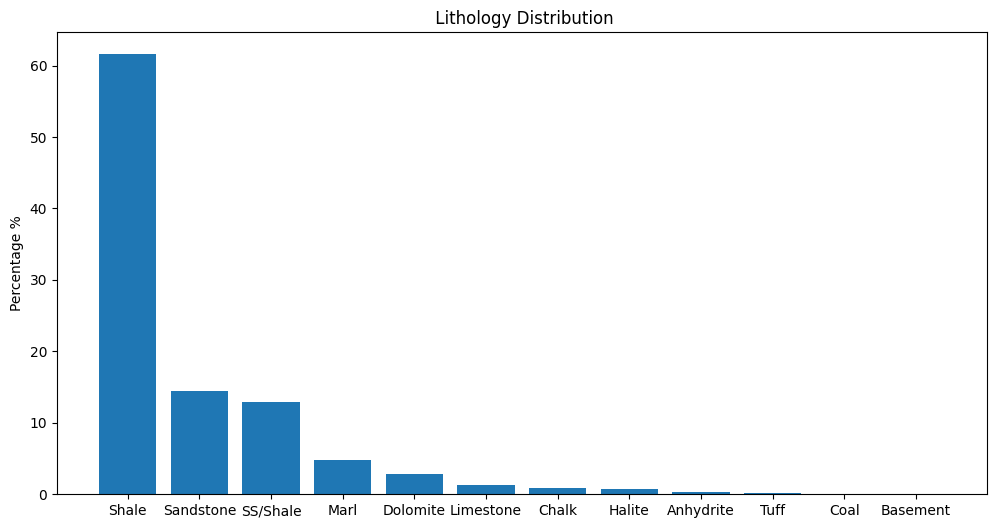

In [ ]:
lithofacies_names = ['Shale', 'Sandstone', 'SS/Shale', 'Marl', 
                     'Dolomite', 'Limestone', 'Chalk', 'Halite', 'Anhydrite', 
                     'Tuff', 'Coal', 'Basement']

labels = dict(data.FORCE_2020_LITHOFACIES_LITHOLOGY.value_counts())

fig = plt.figure(figsize=(12, 6))
plt.bar(lithofacies_names, (np.array(list(labels.values()))/data.shape[0]) * 100)
plt.ylabel('Percentage %')
plt.title(' Lithology Distribution')
plt.show()

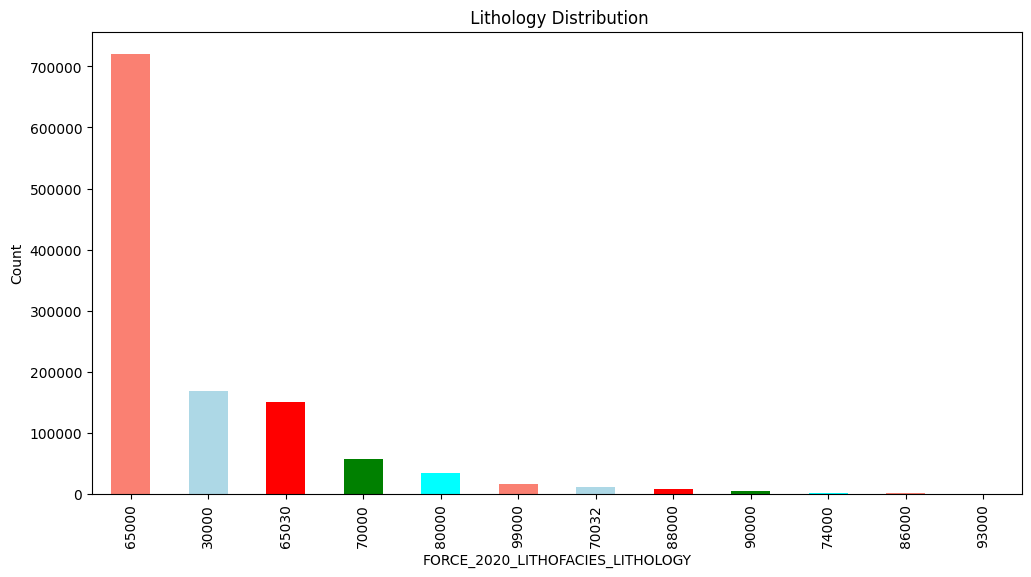

In [ ]:
# fig = plt.figure(figsize=(15, 10))
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.bar( lithofacies_names, training.FORCE_2020_LITHOFACIES_LITHOLOGY.value_counts()/training.shape[0]*100)
# ax.set(title="Percentage Lithology Distribution", ylabel="Percentage (%)", color=["salmon", "lightblue"]);


data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts().plot(kind="bar",  color=["salmon", "lightblue",
                                                                                 "red", "green", "cyan"], figsize=(12, 6));
plt.ylabel('Count')
plt.title(' Lithology Distribution')
plt.show()

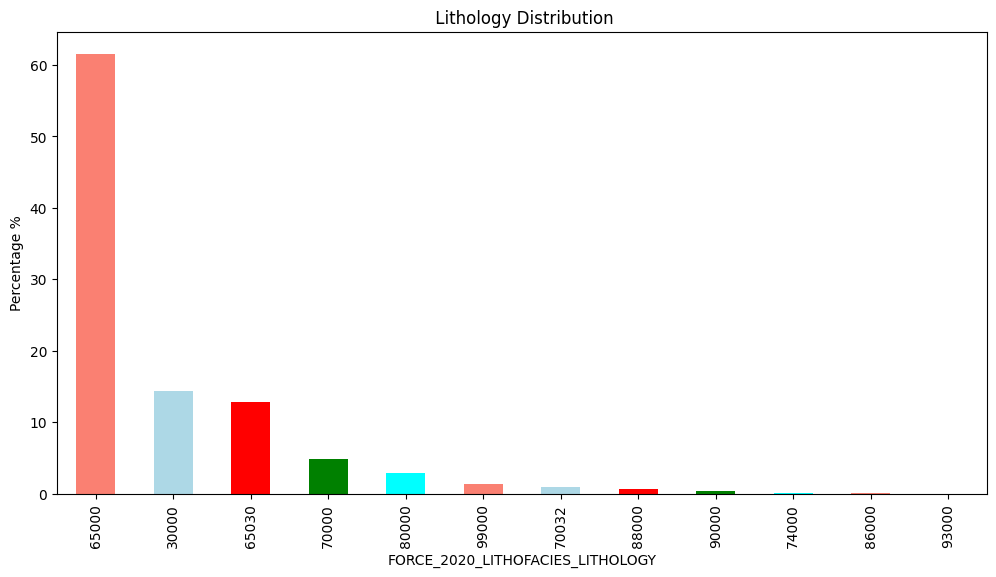

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()/data.shape[0]*100
ax.plot(kind="bar",  color=["salmon", "lightblue", "red", "green", "cyan"]);
plt.ylabel('Percentage %')
plt.title(' Lithology Distribution')
plt.show()
# ax.set_ylabel('Well presence (\%)');
# ax.set_xlabel('FORCE_2020_LITHOFACIES_LITHOLOGY')

In [ ]:
data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()/data.shape[0]*100

FORCE_2020_LITHOFACIES_LITHOLOGY
65000    61.580199
30000    14.432756
65030    12.853788
70000     4.811574
80000     2.847389
99000     1.302423
70032     0.898155
88000     0.701659
90000     0.326353
74000     0.144211
86000     0.092695
93000     0.008800
Name: count, dtype: float64

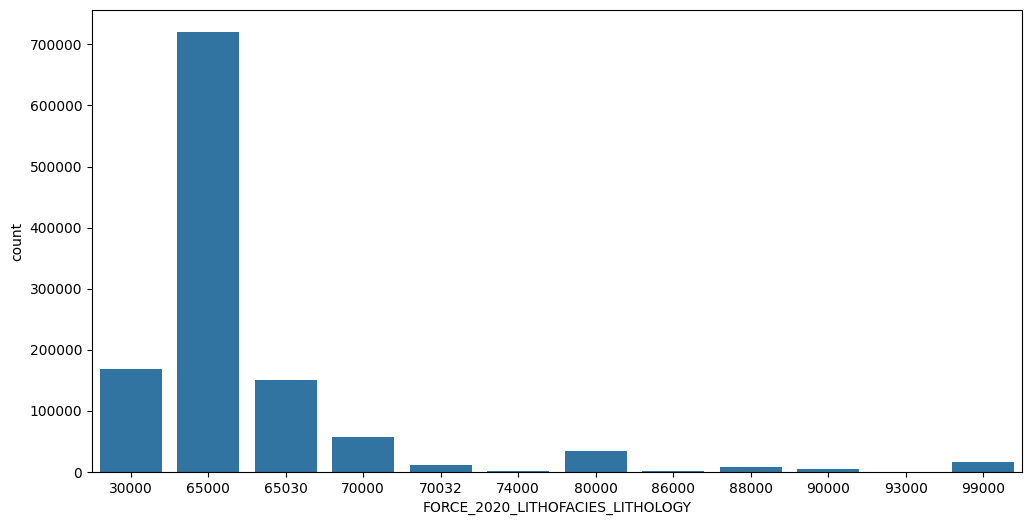

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x="FORCE_2020_LITHOFACIES_LITHOLOGY", data=data);

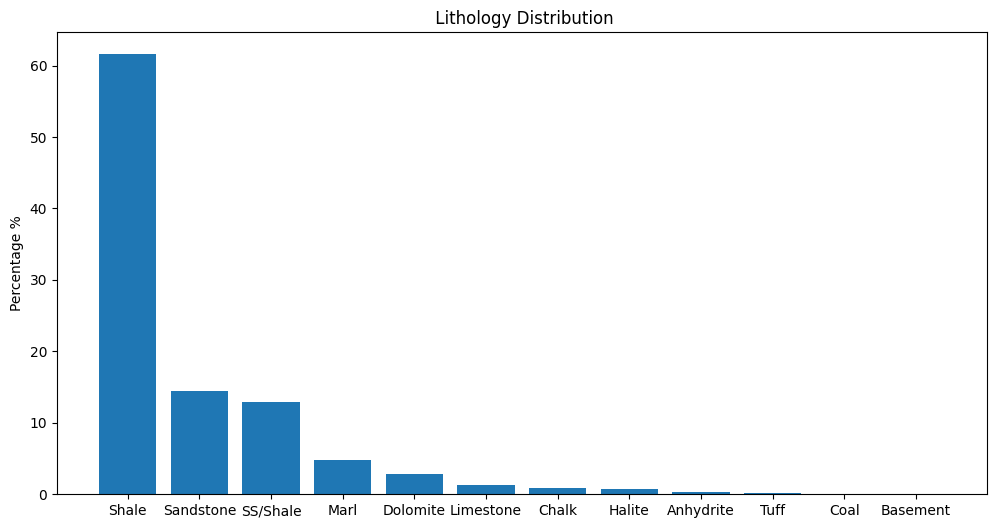

In [ ]:
lithofacies_names = ['Shale', 'Sandstone', 'SS/Shale', 'Marl', 
                     'Dolomite', 'Limestone', 'Chalk', 'Halite', 'Anhydrite', 
                     'Tuff', 'Coal', 'Basement']

labels = dict(data.FORCE_2020_LITHOFACIES_LITHOLOGY.value_counts())

fig = plt.figure(figsize=(12, 6))
plt.bar(lithofacies_names, (np.array(list(labels.values()))/data.shape[0]) * 100)
plt.ylabel('Percentage %')
plt.title(' Lithology Distribution')
plt.show()

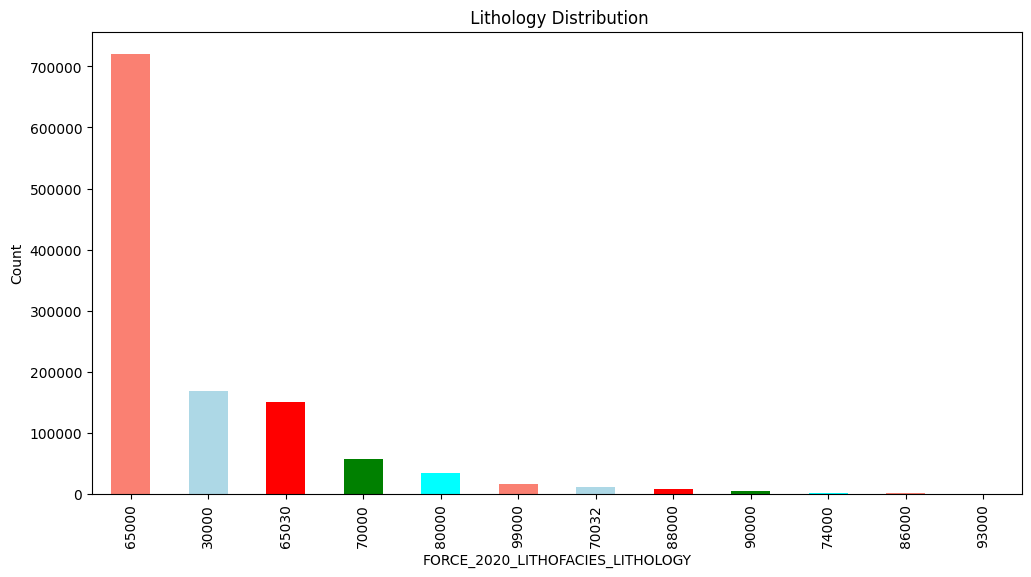

In [ ]:
# fig = plt.figure(figsize=(15, 10))
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.bar( lithofacies_names, training.FORCE_2020_LITHOFACIES_LITHOLOGY.value_counts()/training.shape[0]*100)
# ax.set(title="Percentage Lithology Distribution", ylabel="Percentage (%)", color=["salmon", "lightblue"]);


data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts().plot(kind="bar",  color=["salmon", "lightblue",
                                                                                 "red", "green", "cyan"], figsize=(12, 6));
plt.ylabel('Count')
plt.title(' Lithology Distribution')
plt.show()

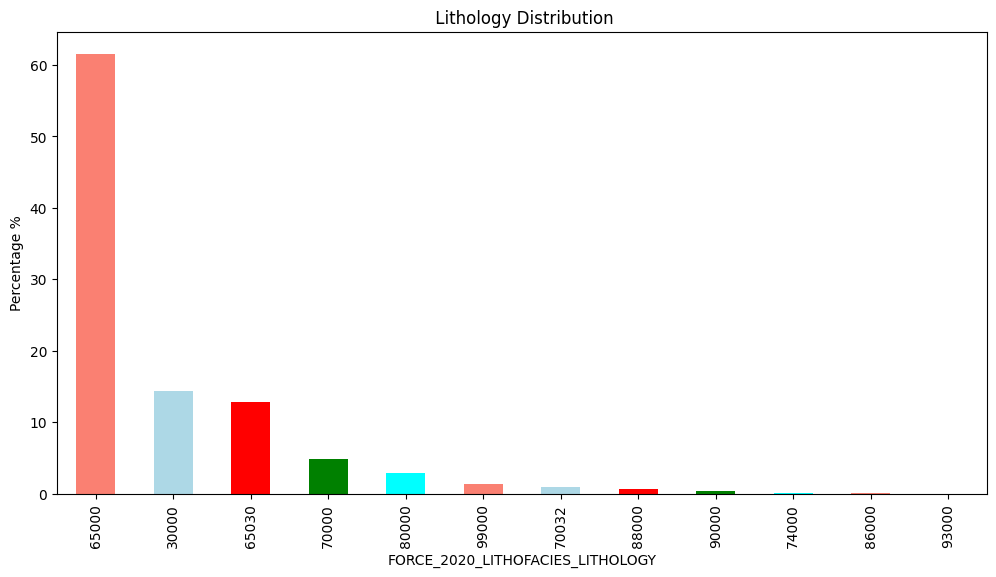

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()/data.shape[0]*100
ax.plot(kind="bar",  color=["salmon", "lightblue", "red", "green", "cyan"]);
plt.ylabel('Percentage %')
plt.title(' Lithology Distribution')
plt.show()
# ax.set_ylabel('Well presence (\%)');
# ax.set_xlabel('FORCE_2020_LITHOFACIES_LITHOLOGY')

In [ ]:
data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()/data.shape[0]*100

FORCE_2020_LITHOFACIES_LITHOLOGY
65000    61.580199
30000    14.432756
65030    12.853788
70000     4.811574
80000     2.847389
99000     1.302423
70032     0.898155
88000     0.701659
90000     0.326353
74000     0.144211
86000     0.092695
93000     0.008800
Name: count, dtype: float64

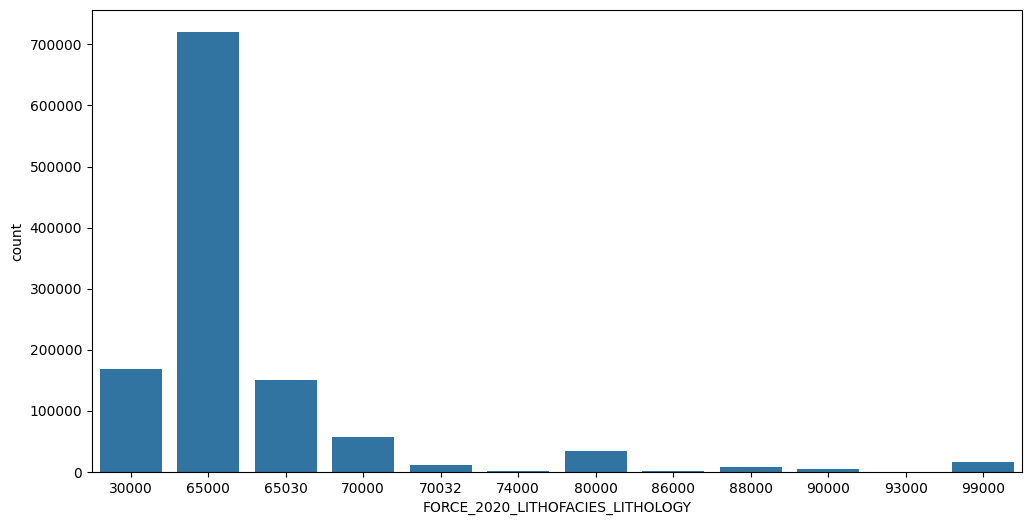

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x="FORCE_2020_LITHOFACIES_LITHOLOGY", data=data);

## Group & formation

In [ ]:
print(f'Formation count: {len(data.FORMATION.value_counts())}')
print(f'Group count: {len(data.GROUP.value_counts())}')

Formation count: 69
Group count: 14


In [ ]:
data.GROUP.value_counts()

GROUP
HORDALAND GP.       293155
SHETLAND GP.        234028
VIKING GP.          131999
ROGALAND GP.        131944
DUNLIN GP.          119085
NORDLAND GP.        111490
CROMER KNOLL GP.     52320
BAAT GP.             35823
VESTLAND GP.         26116
HEGRE GP.            13913
ZECHSTEIN GP.        12238
BOKNFJORD GP.         3125
ROTLIEGENDES GP.      2792
TYNE GP.              1205
Name: count, dtype: int64

In [ ]:
#To get total number of wells
print(f'Initial total number of data wells: {len(data.WELL.unique())}')

Initial total number of data wells: 98


<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
C:\Users\promi\AppData\Local\Temp\ipykernel_30408\1955609655.py:8: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel('Well presence (\%)');
C:\Users\promi\AppData\Local\Temp\ipykernel_30408\1955609655.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.columns[2:-2], rotation=45)


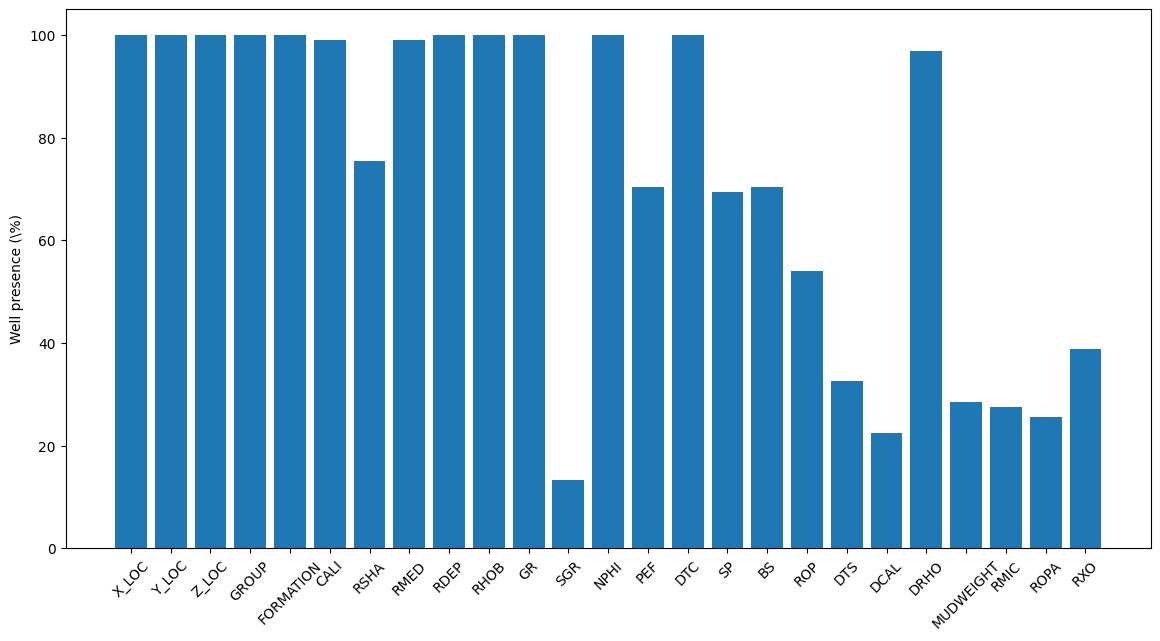

In [ ]:
occurences = np.zeros(25)
for well in data['WELL'].unique():
    occurences += data[data['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(data.WELL.unique().shape[0]-occurences)/data.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(data.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Well presence (\%)');

## Log distribution

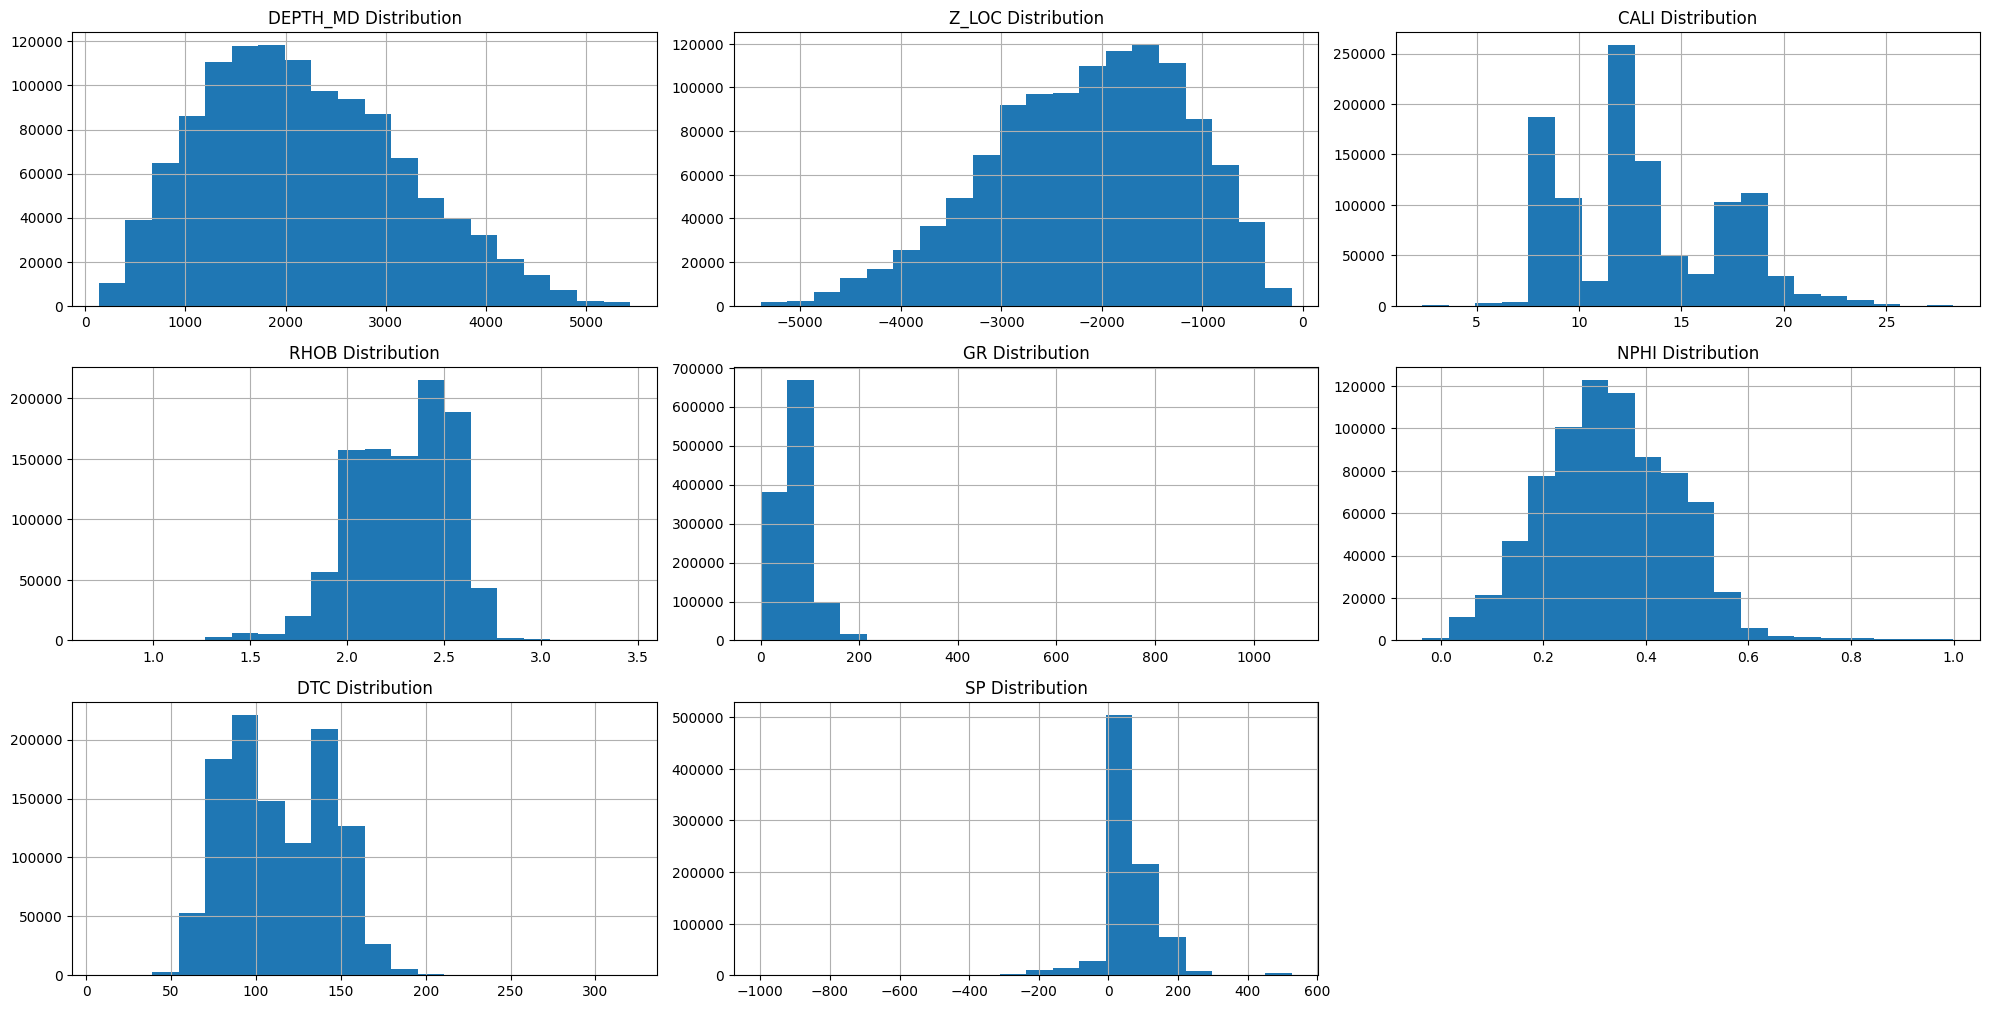

In [3]:
histograms_plot(data, data[['DEPTH_MD', 'Z_LOC', 'CALI', 'RHOB', 'GR', 'NPHI',  'DTC', 'SP']].columns,6,3)


c:\temp\virtualenv\python12\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


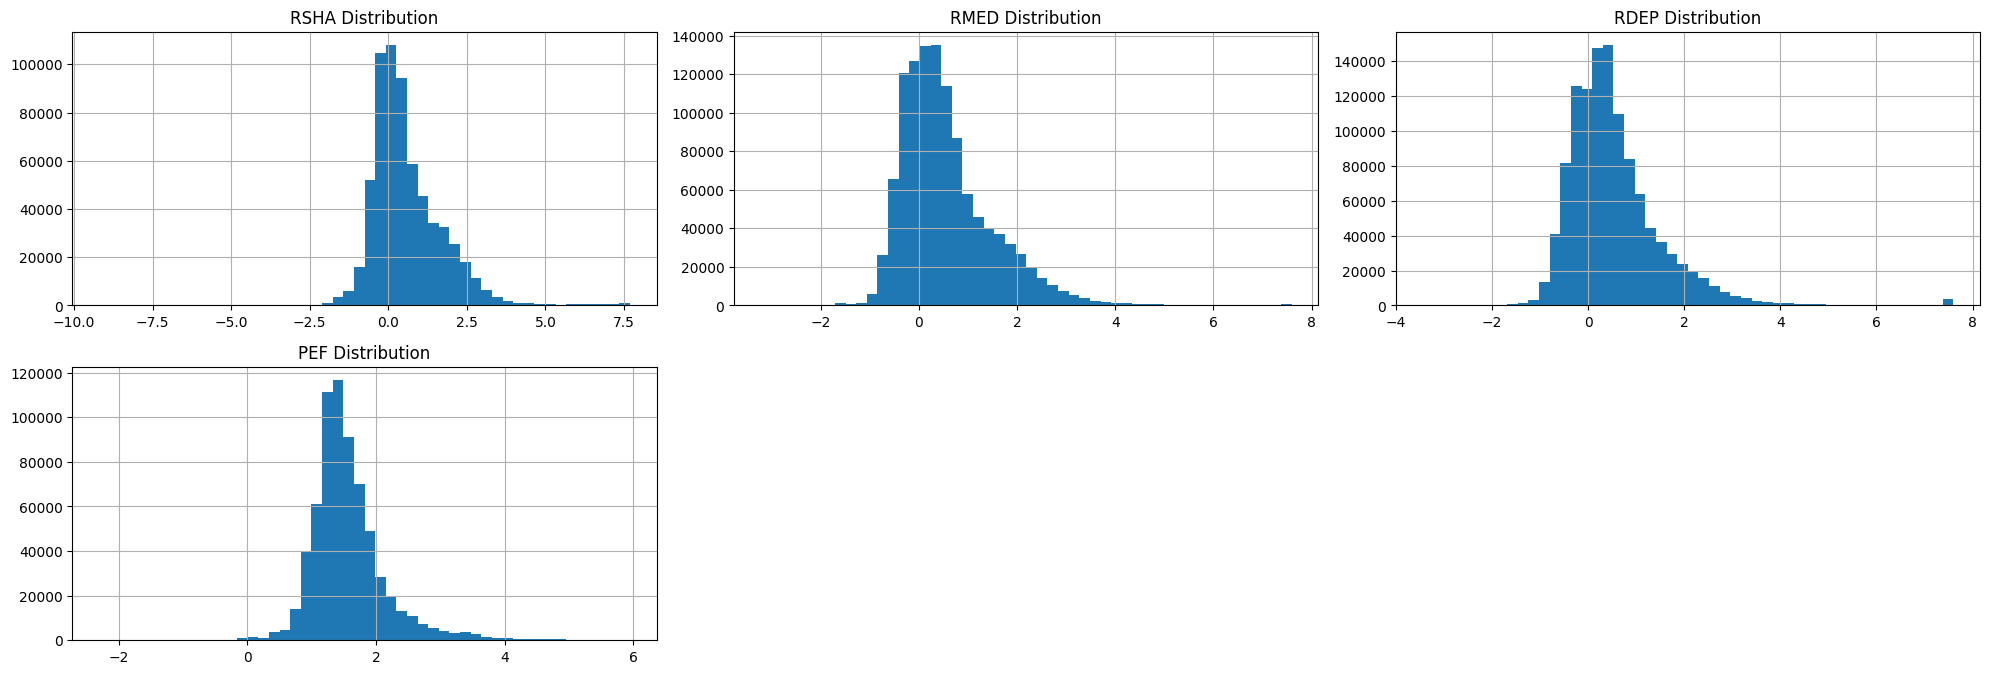

In [4]:
histograms_log_plot(data, data[['RSHA', 'RMED', 'RDEP', 'PEF']].columns,6,3)


# Missing Data Analysis 


## Missing No

In [ ]:
#conda install -c conda-forge missingno

<Axes: >

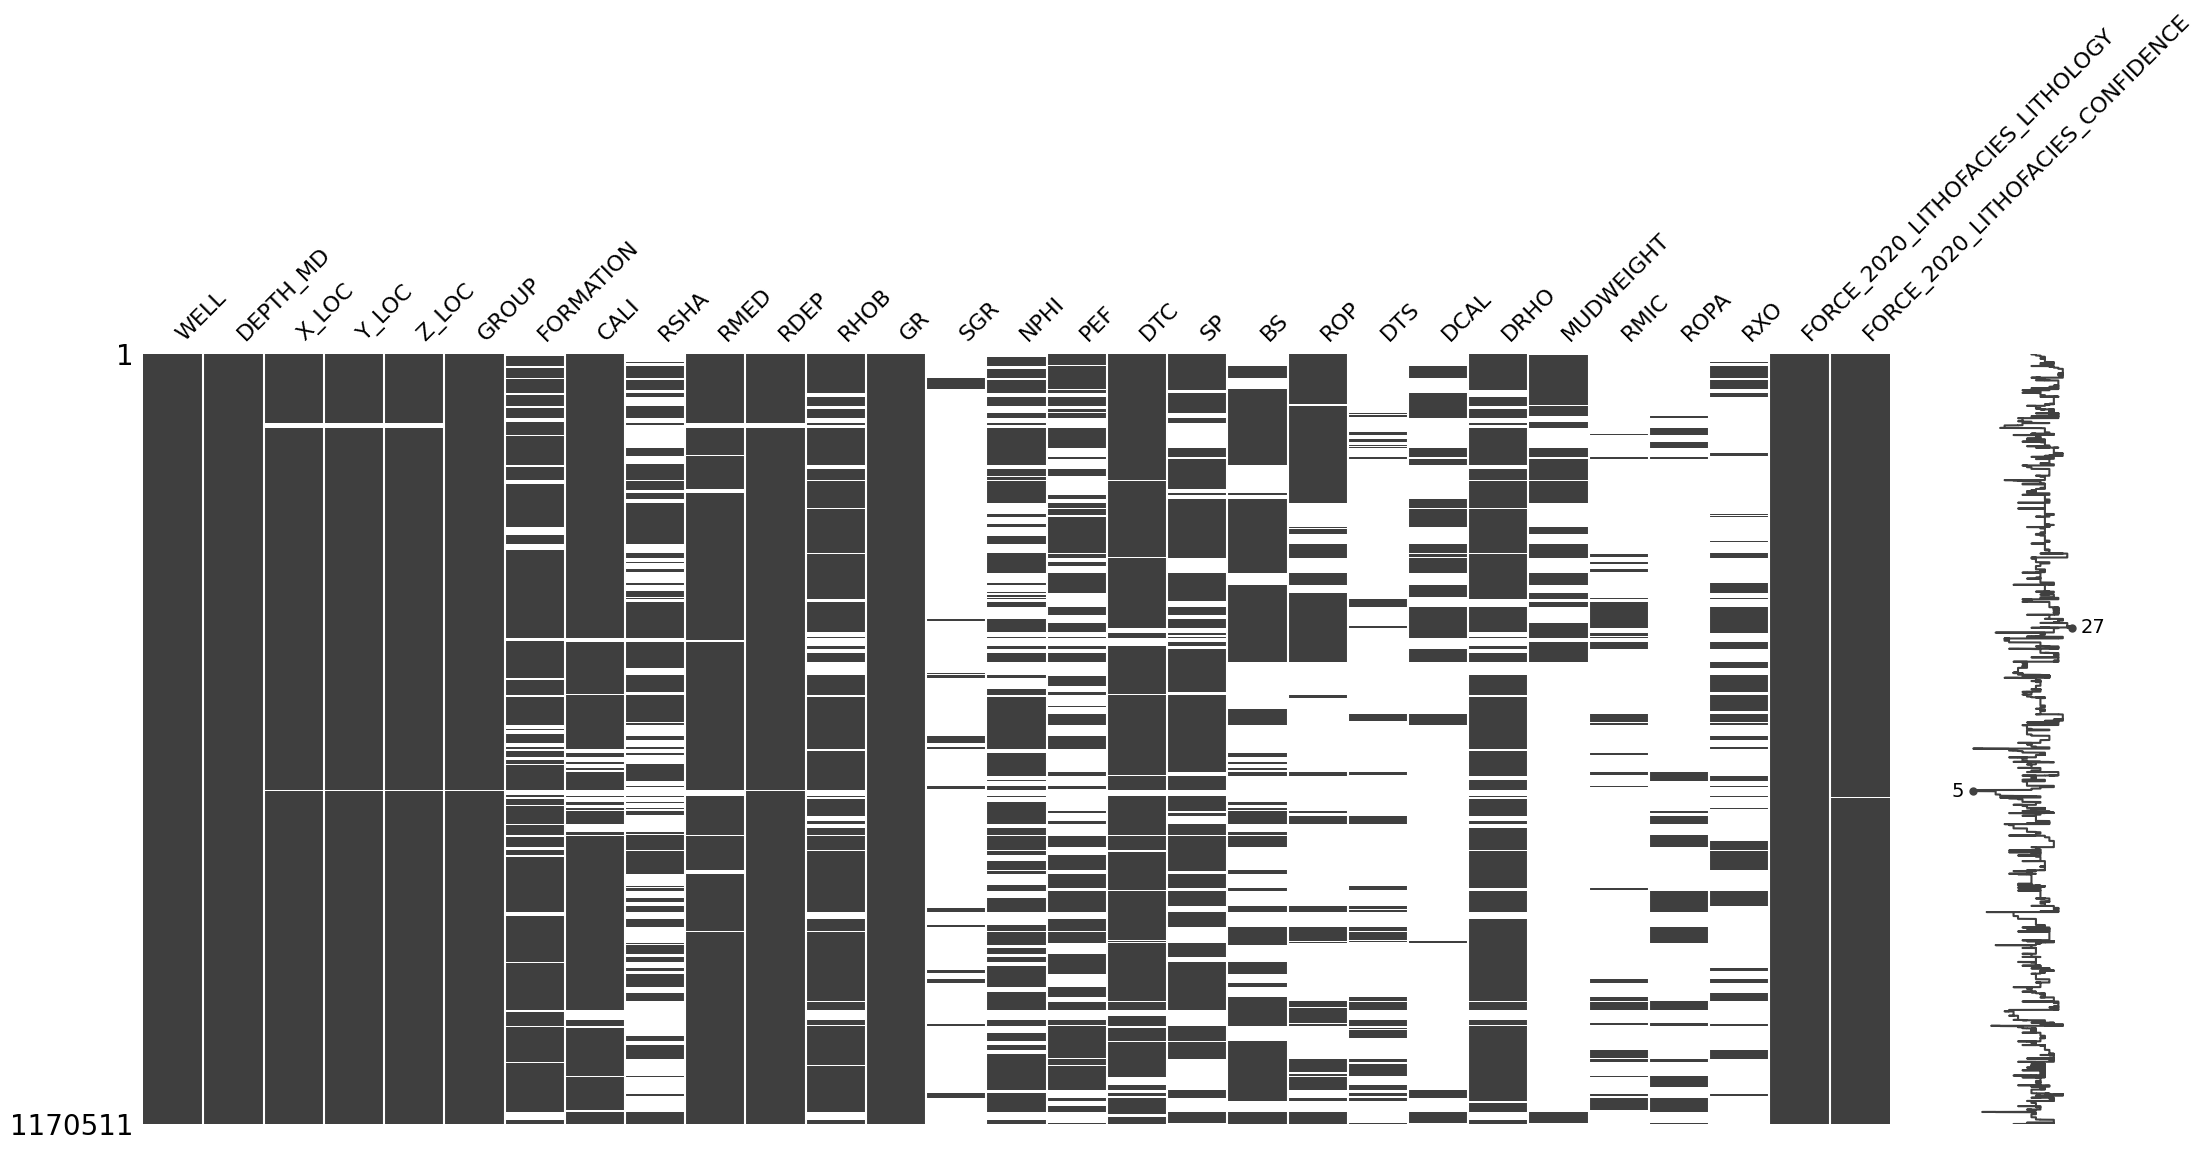

In [3]:
#from jeremy
#pip install missingno
import missingno

missingno.matrix(data)

In [32]:
measures_list = data.columns.values[7:-2]
measures_list

array(['CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT',
       'RMIC', 'ROPA', 'RXO'], dtype=object)

This shows the percentage of missing data of well logs in the data provided.
SGR has the highest number of missing data with over 90% missing followed by sonic. Gr log is complete in all the wells
and deep resistivity log having less than 1% missing value

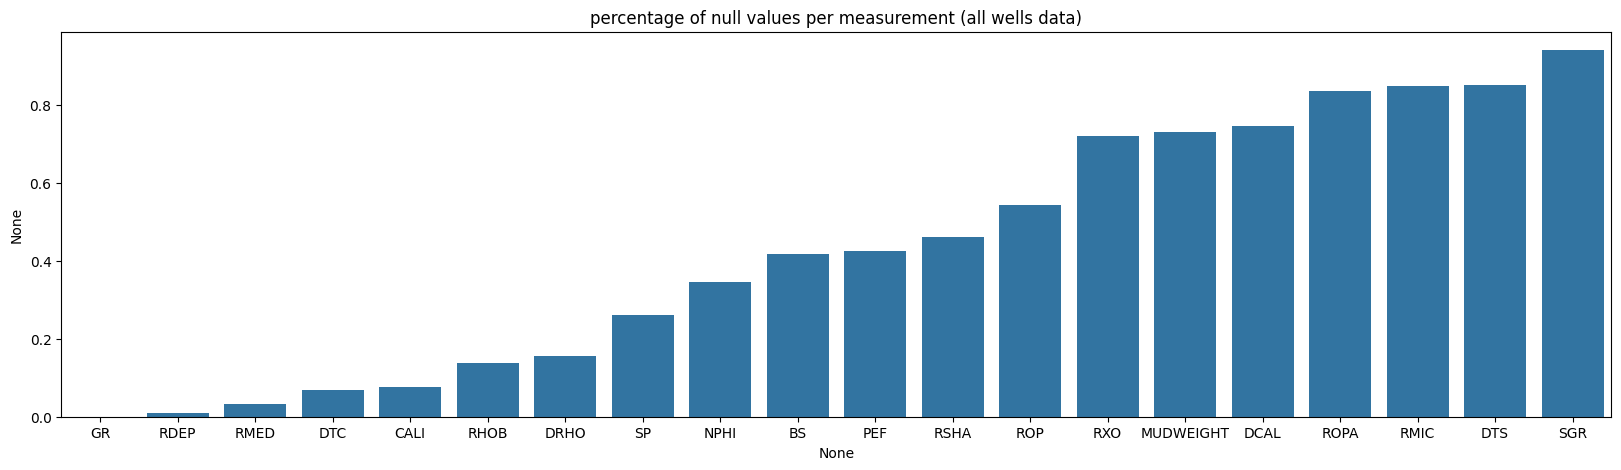

In [34]:
nan_values = data[measures_list].isna().mean().sort_values()

plt.figure(figsize=(20,5))
splot = sns.barplot(x=nan_values.index,y=nan_values)
splot.set_title("percentage of null values per measurement (all wells data)")
plt.show()

In [35]:
nan_values_per_well = data.isna()[measures_list]
nan_values_per_well["WELL"] = data.WELL
nan_values_per_well = nan_values_per_well.groupby("WELL").mean()

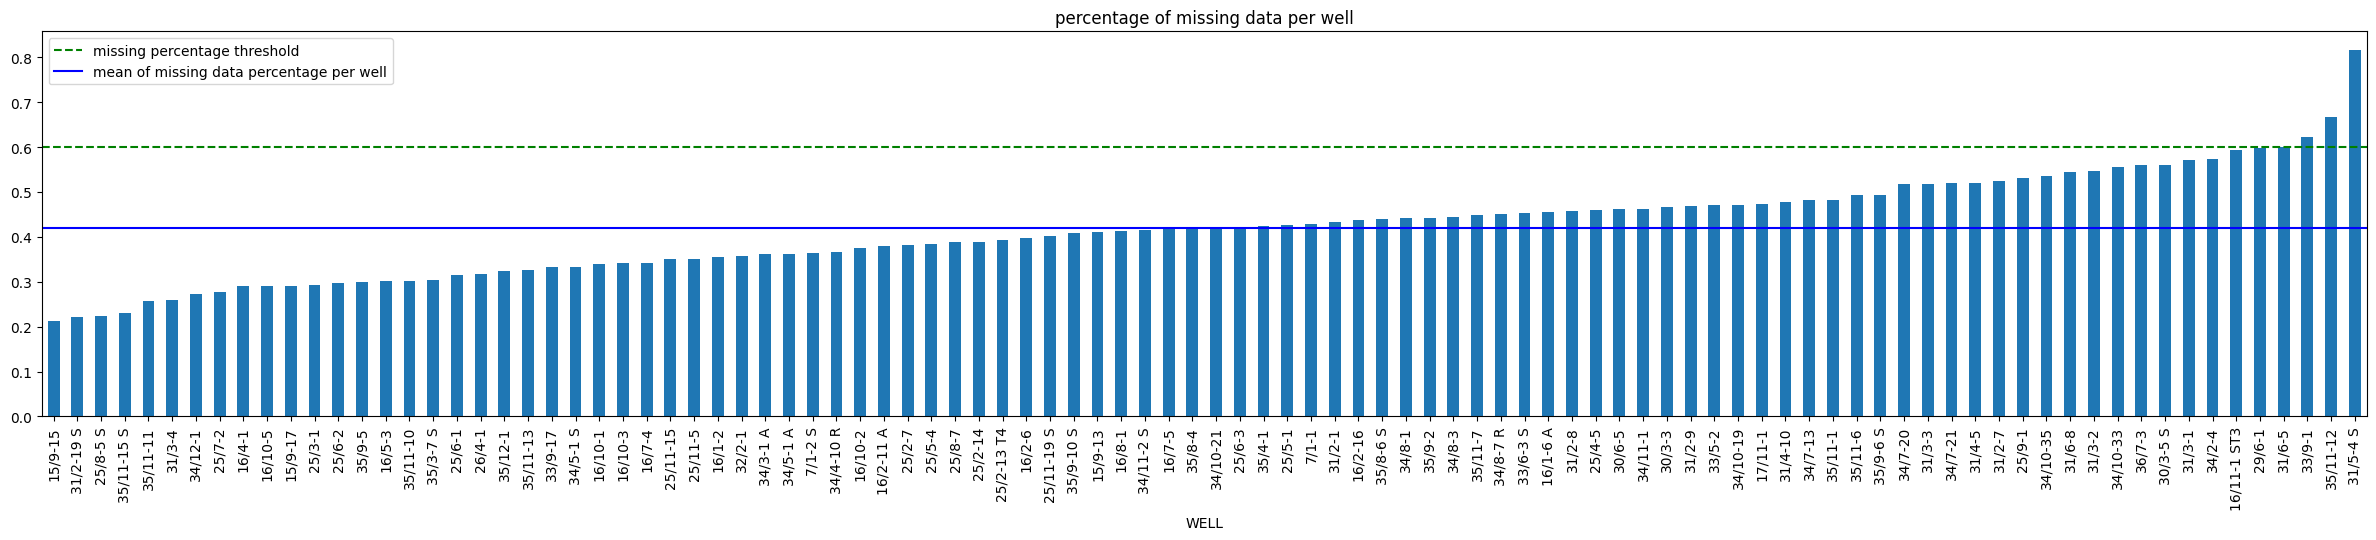

In [36]:
##order wells per missing values count overall
missing_data_threshold = 0.6
wells_missing_data = nan_values_per_well.mean(axis=1).sort_values()
wells_missing_data.plot(kind="bar",figsize=(30,5))
plt.axhline(y=missing_data_threshold, color='green', linestyle='--',label="missing percentage threshold")
plt.axhline(y=wells_missing_data.mean(), color='blue', linestyle='-',label="mean of missing data percentage per well")
plt.title("percentage of missing data per well")
plt.legend()
plt.show()

In [37]:
wells_missing_data[wells_missing_data>0.6]

WELL
31/6-5      0.600725
33/9-1      0.622905
35/11-12    0.668109
31/5-4 S    0.817138
dtype: float64

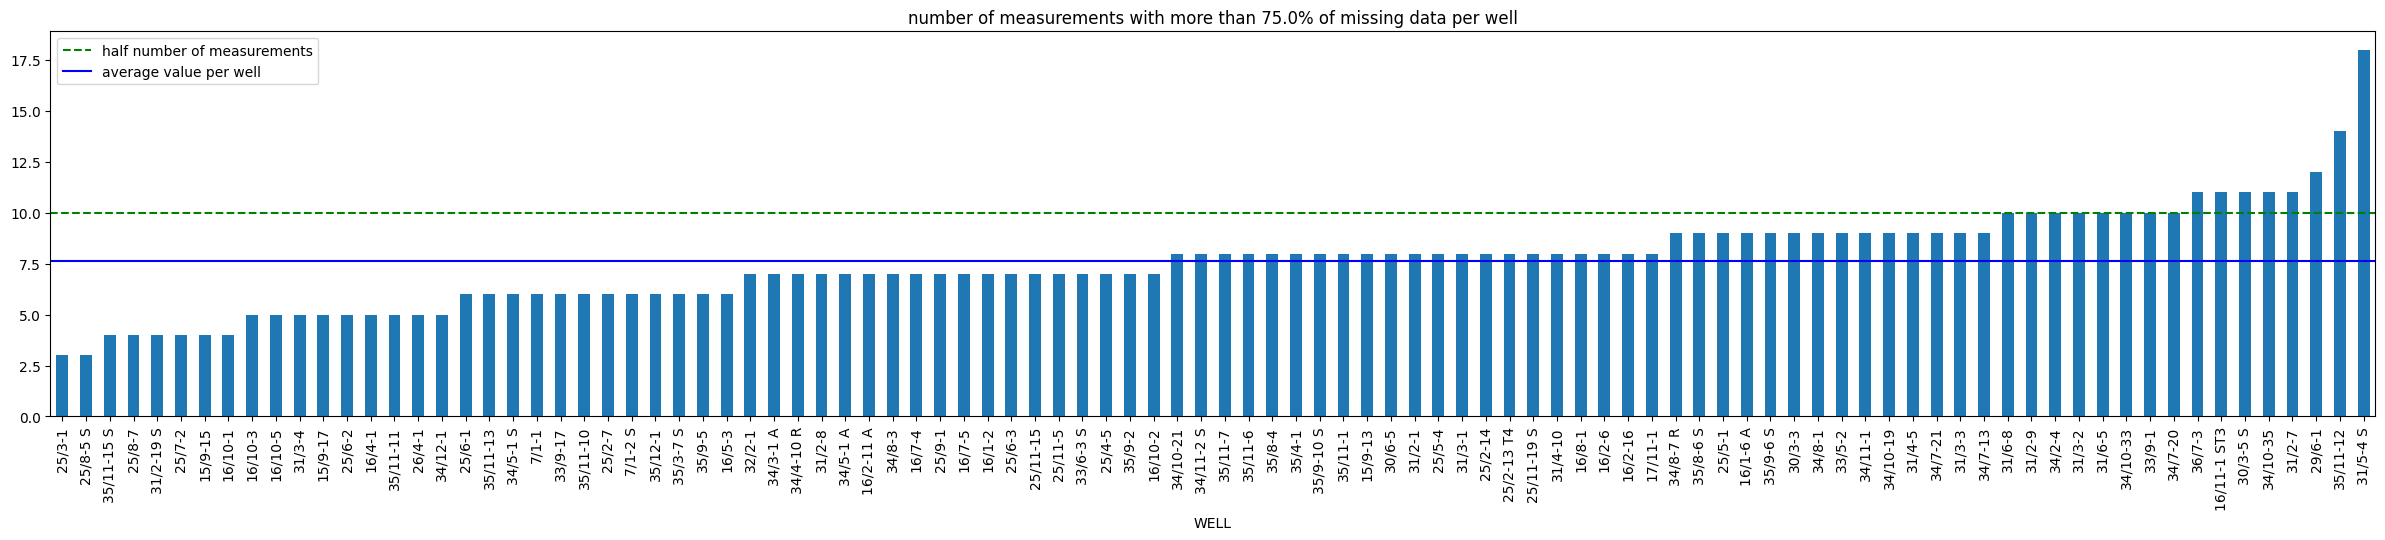

In [38]:
##number of features per well with N% of missing values
feature_missing_data_threshold = 0.75

wells_missing_data2 = (nan_values_per_well>feature_missing_data_threshold).sum(axis=1).sort_values()
wells_missing_data2.plot(kind="bar",figsize=(30,5))
plt.axhline(y=nan_values_per_well.shape[1]//2, color='green', linestyle='--',label="half number of measurements")
plt.axhline(y=wells_missing_data2.mean(), color='blue', linestyle='-',label="average value per well")
plt.title("number of measurements with more than {}% of missing data per well".format(feature_missing_data_threshold*100))

plt.legend()
plt.show()

In [39]:
wells_missing_data2[wells_missing_data2>=10]

WELL
31/6-8         10
31/2-9         10
34/2-4         10
31/3-2         10
31/6-5         10
34/10-33       10
33/9-1         10
34/7-20        10
36/7-3         11
16/11-1 ST3    11
30/3-5 S       11
34/10-35       11
31/2-7         11
29/6-1         12
35/11-12       14
31/5-4 S       18
dtype: int64

### *COMMENTS*
- GR has no missing value
- ROPA,RMIC,DTS,SGR have more than 80% of missing values (remove them from data?keep them?)
- According to the boxplots, There are some features we could put aside because they have a very high level of null values percentage for almost all wells (more than 75% of wells): SGR, DTS, DCAL,RMIC, RXO. MUDWEIGHT also have more than 40% empty values for 75% of wells.

outliers (wells)
- there are 4 wells with more than 60% of missing data (31/6-5 ,33/9-1,35/11-12,31/5-4 S).

- Well 31/5-4 S has 81% of missing data. We can put them aside during modelling. 

- Depending on the results we can also try to remove other wells with more than 50% of missing values (average missing values percentage is 41%).
- There are 4 wells with 10+/20 features which have more than 90% of missing values : (well,number) 34/10-33  10, 34/7-20   10, 30/3-5 S  11, 36/7-3   11
- There are 16 wells with 10+/20 features which have more than 75% of missing values : (well,number) 31/6-8  10
31/2-9         10
34/2-4         10
31/3-2         10
31/6-5         10
34/10-33       10
33/9-1         10
34/7-20        10
36/7-3         11
16/11-1 ST3    11
30/3-5 S       11
34/10-35       11
31/2-7         11
29/6-1         12
35/11-12       14
31/5-4 S       18

We can remove those wells or impute missing values during modelisation

In [40]:
#Check null values distribution per z, depth_md (depth) to verify 
#if there is a pattern that could be due to depth

nb_intervals = 20
cat_z_df = data.loc[:,list(measures_list)+["Z_LOC"]]
cat_z_df["z_inter"] = pd.cut(cat_z_df.Z_LOC,nb_intervals, labels=range(nb_intervals,0,-1))

null_per_z = cat_z_df.loc[:,list(measures_list)].isna()
null_per_z["z_inter"] = cat_z_df["z_inter"]
null_per_z = null_per_z.groupby("z_inter").mean()

C:\Users\promi\AppData\Local\Temp\ipykernel_30408\2196648254.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_per_z = null_per_z.groupby("z_inter").mean()


<Figure size 640x480 with 0 Axes>

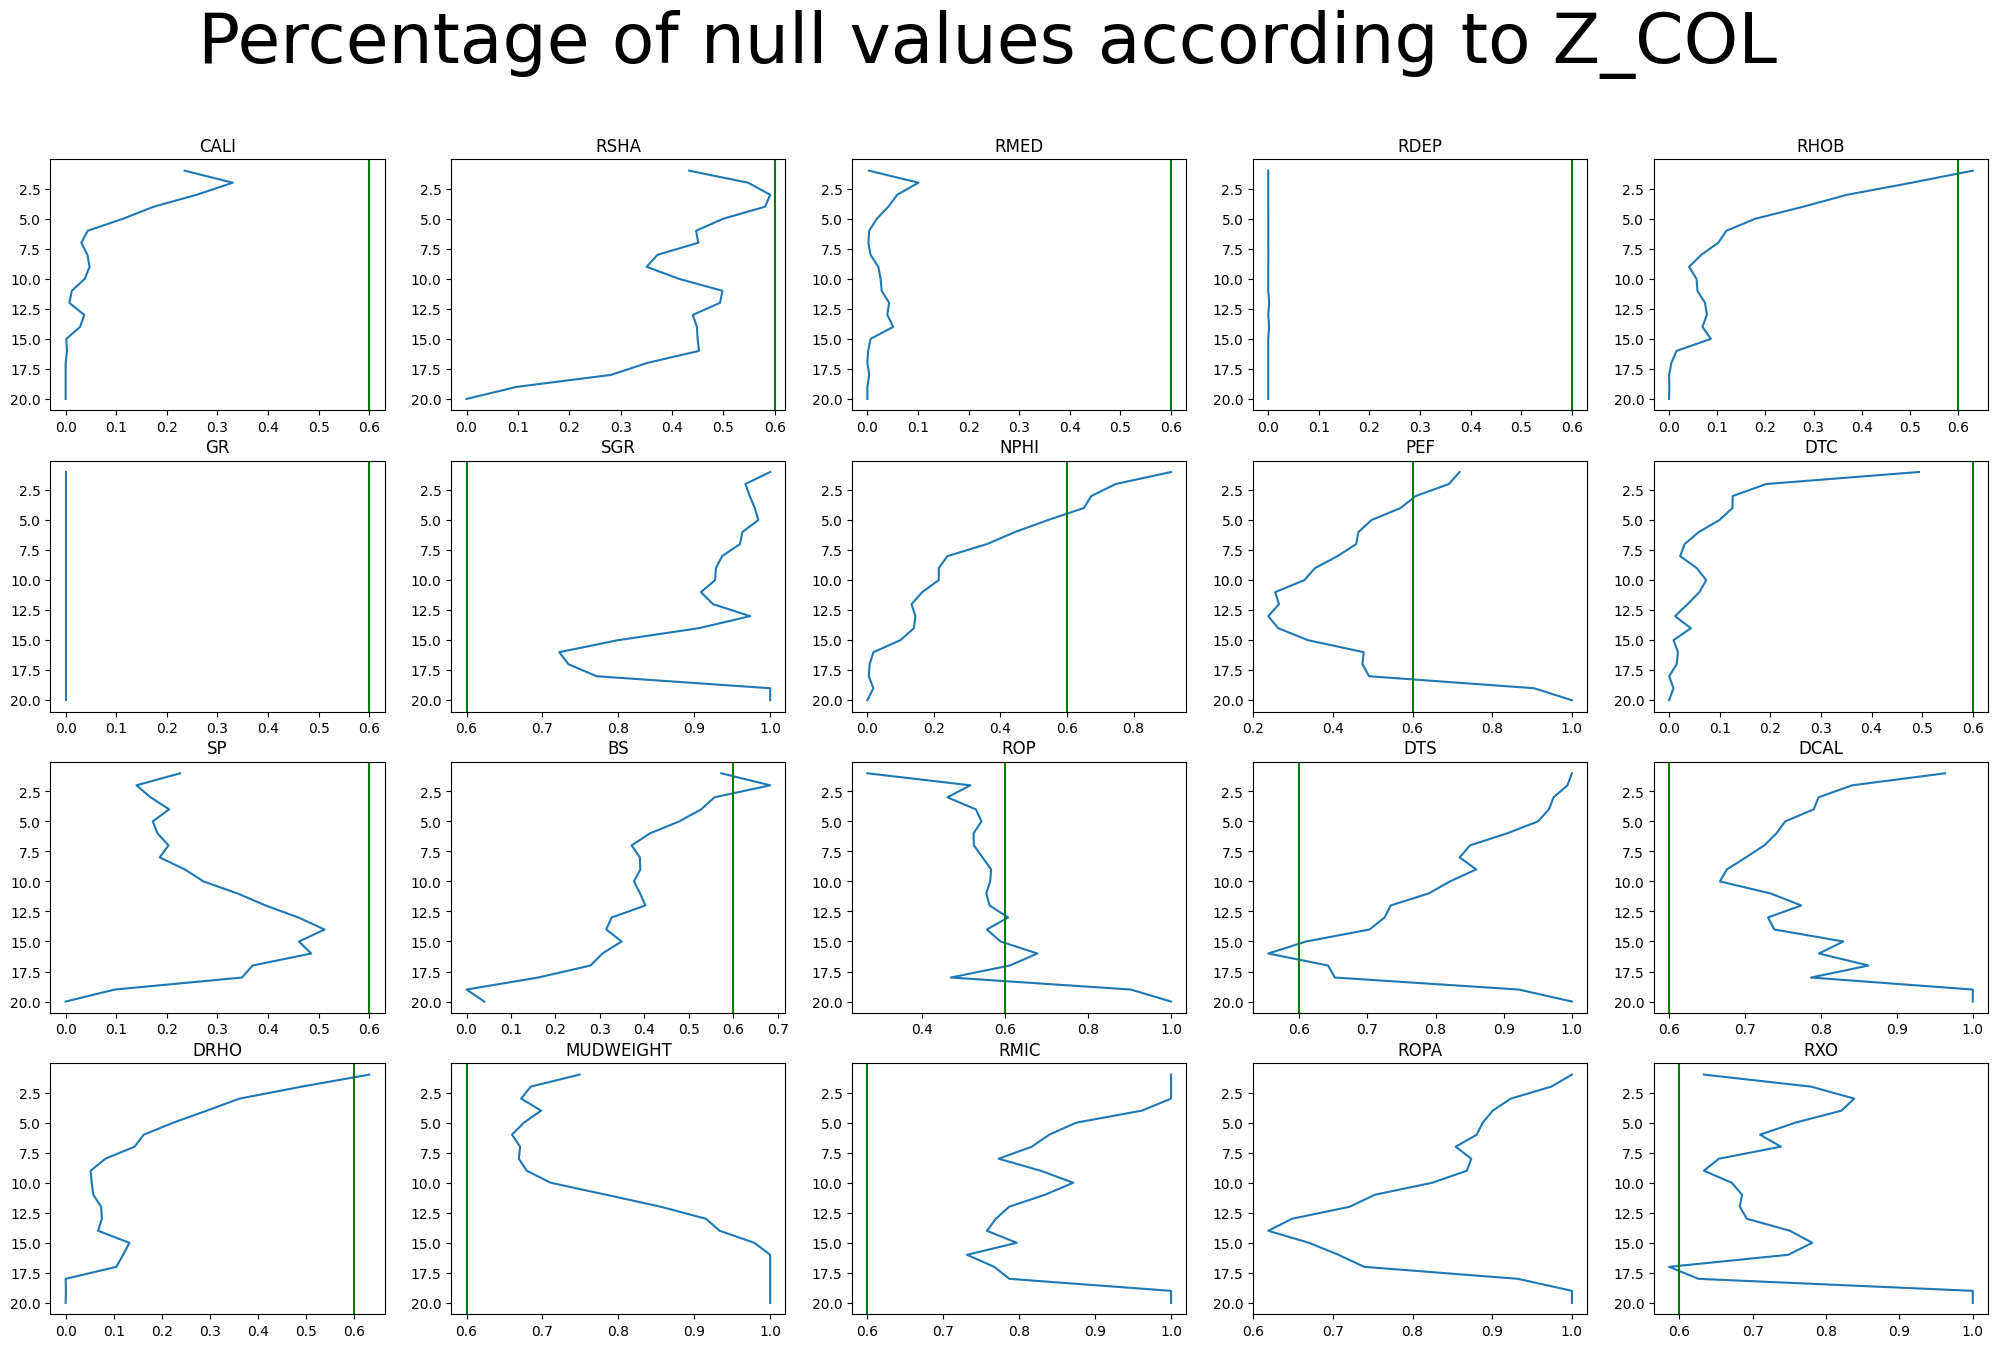

In [41]:
plt.figure()
nb_rows = 4
ncols = int(np.ceil(len(measures_list) /nb_rows))
fig,axes = plt.subplots(nb_rows,ncols,figsize=(25,15))
axes = axes.flatten()
for i,col in enumerate(measures_list):
    axes[i].plot(null_per_z[col].values,list(null_per_z.index.values))
    axes[i].set_title(col)
    axes[i].axvline(x=0.6,color="green")
    axes[i].invert_yaxis()
fig.suptitle("Percentage of null values according to Z_COL",fontsize=50)
plt.show()

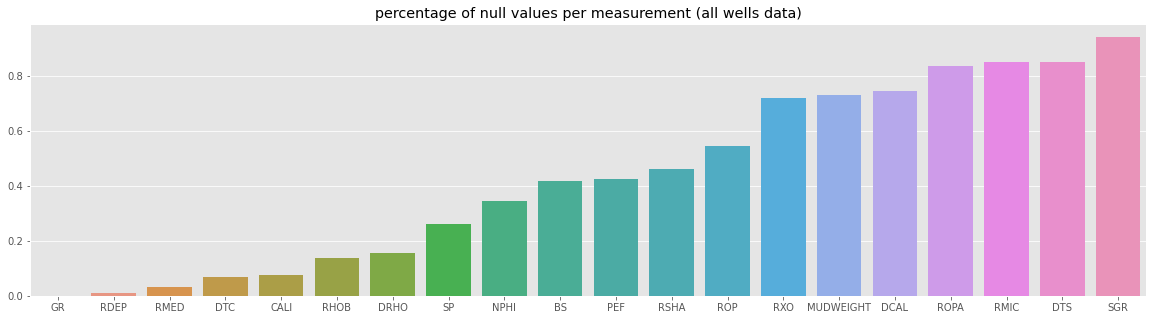



## Missing data per lithology

In [42]:
#percentage of null values per lithofacy
null_values_per_label = data.loc[:,list(measures_list)].isna()
null_values_per_label["FORCE_2020_LITHOFACIES_LITHOLOGY"] = data["FORCE_2020_LITHOFACIES_LITHOLOGY"]
null_values_per_label["FORCE_2020_LITHOFACIES_CONFIDENCE"] = data["FORCE_2020_LITHOFACIES_CONFIDENCE"]
null_values_per_label = null_values_per_label.groupby("FORCE_2020_LITHOFACIES_LITHOLOGY").mean().mean(axis=1)

In [43]:
null_values_per_label

FORCE_2020_LITHOFACIES_LITHOLOGY
30000    0.442972
65000    0.465620
65030    0.492419
70000    0.417488
70032    0.440266
74000    0.472072
80000    0.439309
86000    0.437086
88000    0.653615
90000    0.393131
93000    0.406380
99000    0.599222
dtype: float64

<Axes: title={'center': 'Null values percentage per lithofacies'}, xlabel='FORCE_2020_LITHOFACIES_LITHOLOGY'>

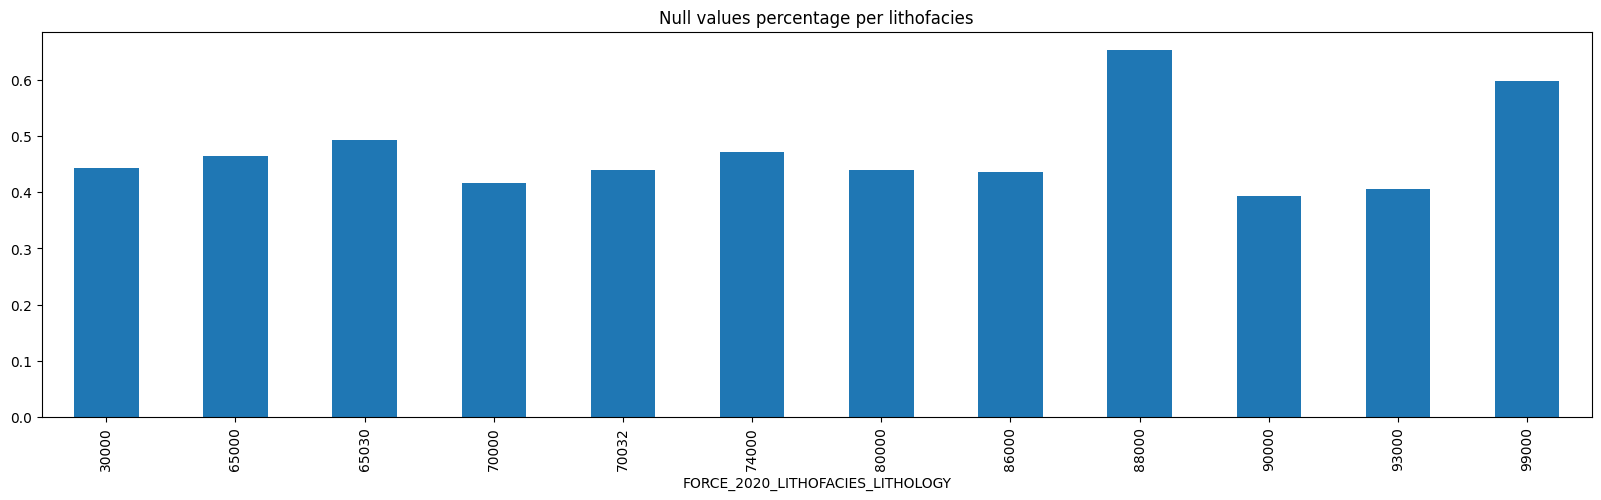

In [44]:
null_values_per_label.plot(kind="bar",figsize=(20,5),title="Null values percentage per lithofacies")

### *COMMENTS*
- The percentage of measurements null values according to z show that some very sparse measurements like SGR,DTS,RMIC,ROPA and many more become less sparse around -3545 and -4074 of Z_LOC.

- A lot of measurements (NHPI, PEF,BS) are very sparse when Z_LOC is very high (-111 to -1432). Is it due to the fact that they rae not useful to classify lithofacies when closer to ground surface? 
- Same behaviour when closer to the bottom (PEF,ROP)

- Maybe we should train a specific model for near ground surface/bottom surface lithofacies, for Z_LOC around -3545 and -4074 and a model for the remaining Z_LOC.

- percentage of null values per lithofacy class is similar and close to 0.4. Exceptions are "99000" and "88000" lithofacies with 60% of null values. So the sparsity is a priori not related to lithofacies.

## Data distribution

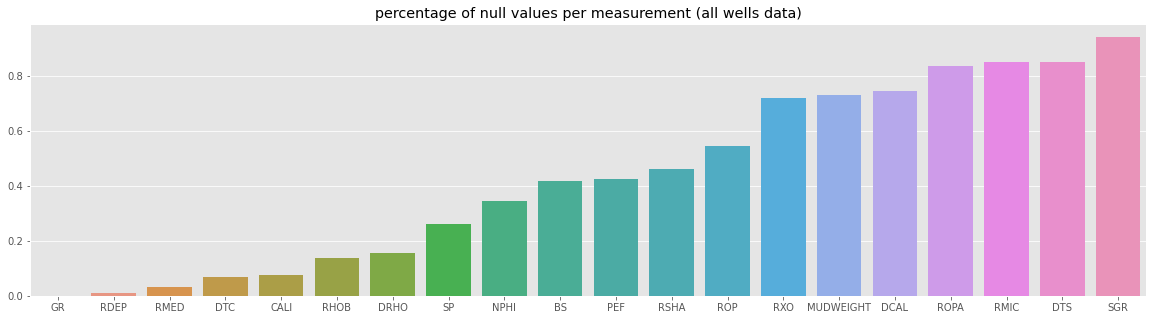

In [10]:
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


## Mising data in lithology and logs

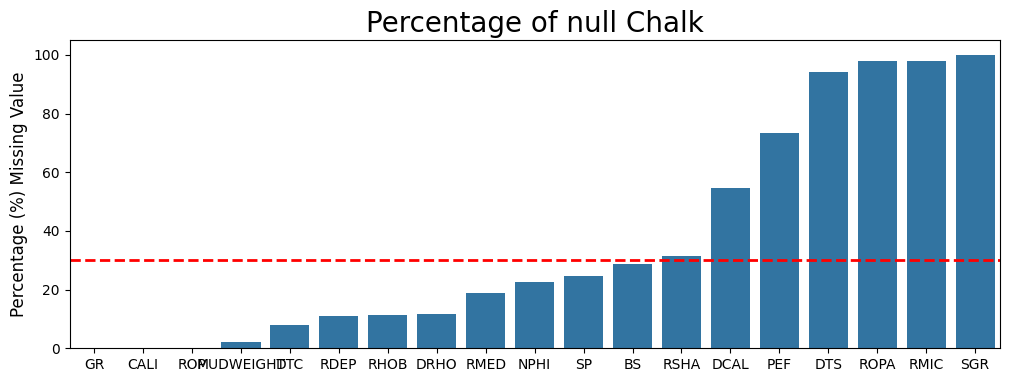

In [17]:
chalk = get_plot_facies(data, 'Chalk')


### Carbonate

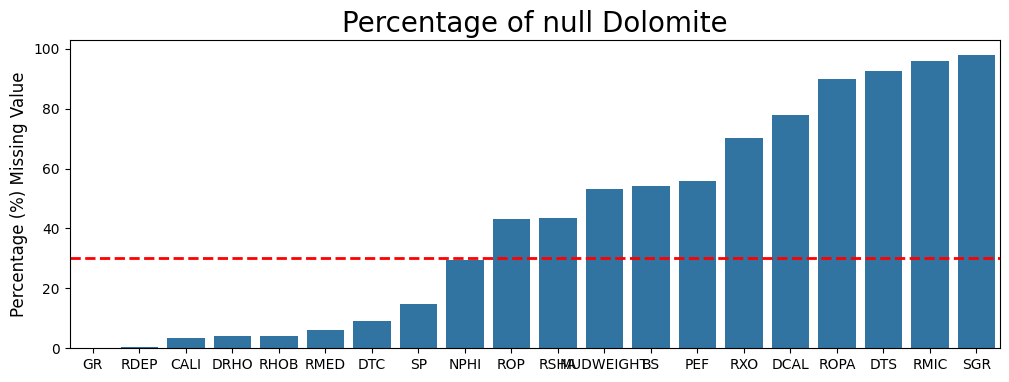

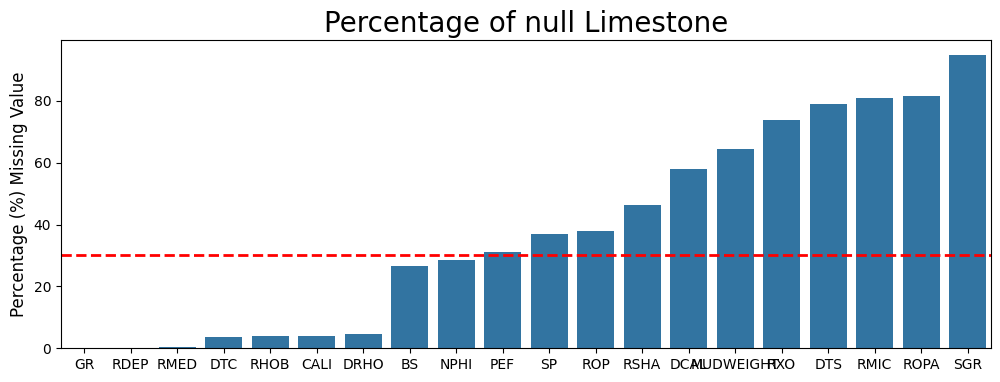

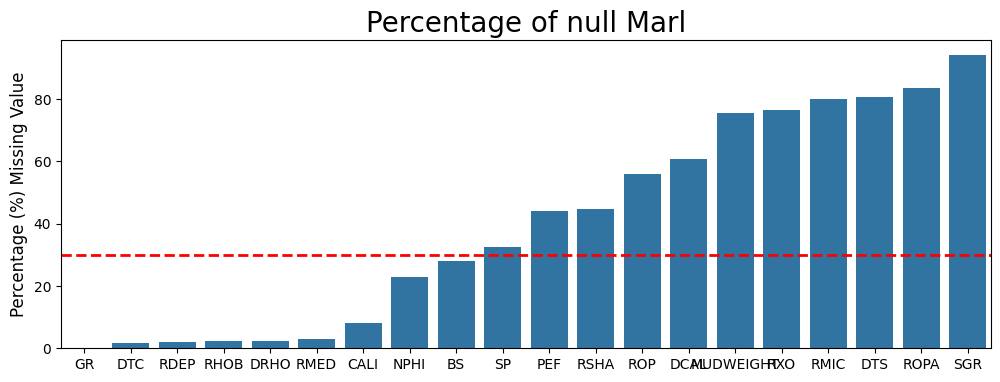

In [28]:
dol = get_plot_facies(data, 'Dolomite')
ls = get_plot_facies(data, 'Limestone')
marl = get_plot_facies(data, 'Marl')


### Clastics

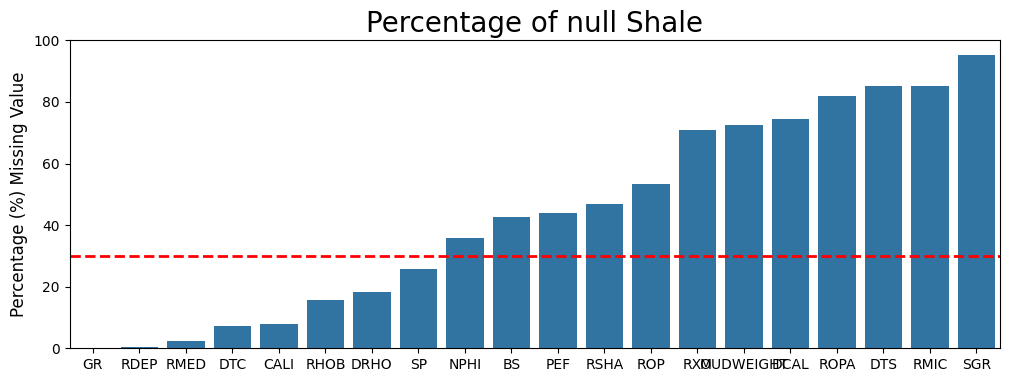

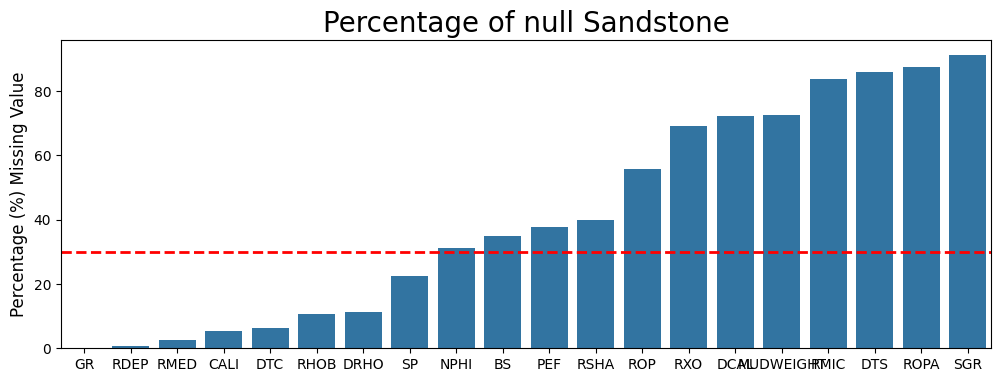

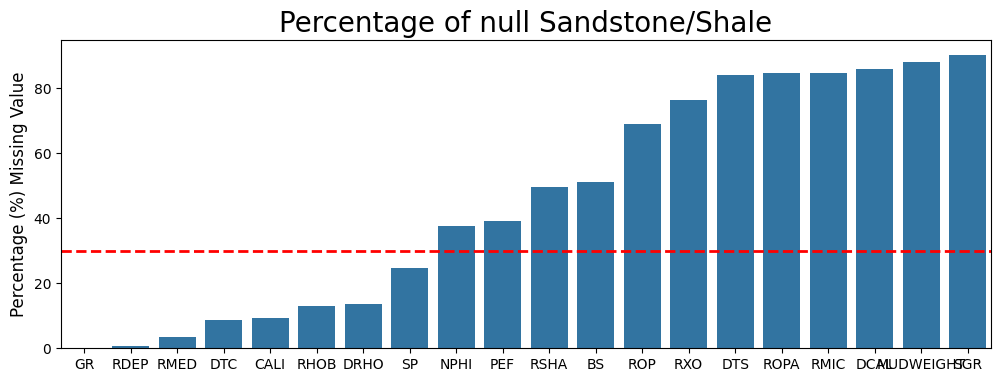

In [29]:
shale = get_plot_facies(data, 'Shale')
sand = get_plot_facies(data, 'Sandstone')
ss = get_plot_facies(data, 'Sandstone/Shale')


### others

In [ ]:

hal = get_plot_facies(data, 'Halite')
anh = get_plot_facies(data, 'Anhydrite')
coal = get_plot_facies(data, 'Coal')
tuff = get_plot_facies(data, 'Tuff')
bs = get_plot_facies(data, 'Basement')

In [17]:
numeric_features_col = data.columns.drop(["WELL","FORCE_2020_LITHOFACIES_CONFIDENCE","GROUP","FORMATION"])

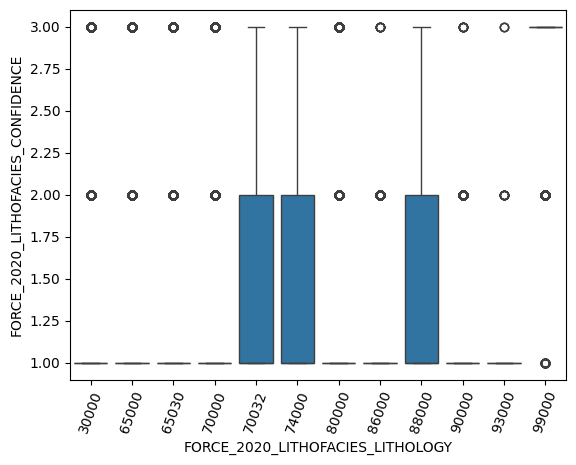

In [18]:
plt.figure()
sns.boxplot(x="FORCE_2020_LITHOFACIES_LITHOLOGY",y="FORCE_2020_LITHOFACIES_CONFIDENCE",data=data)
plt.xticks(rotation=70)
plt.show()

# Scatter

<Axes: xlabel='NPHI', ylabel='RHOB'>

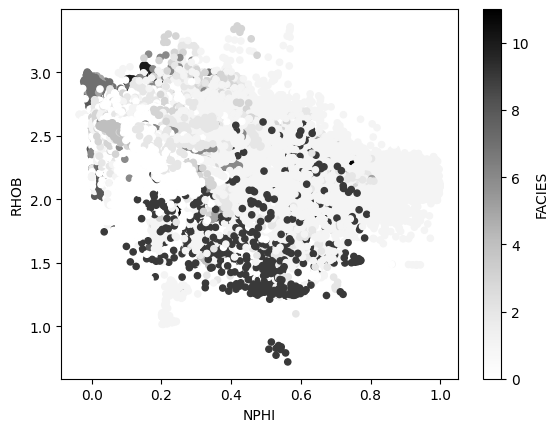

In [4]:
data.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', c='FACIES')

### NPHI vs RHOB

<Axes: xlabel='NPHI', ylabel='RHOB'>

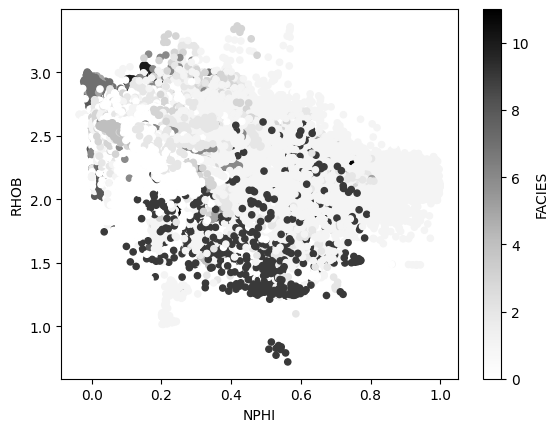

In [5]:
data.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', c='FACIES')

### GR vs RDEP

<Axes: xlabel='GR', ylabel='RDEP'>

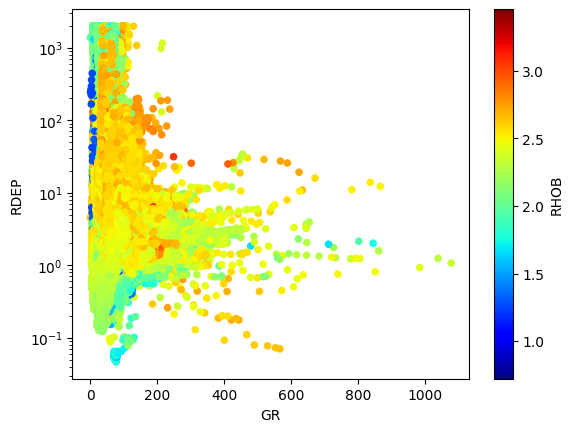

In [6]:
data.plot(kind = 'scatter', x = 'GR', y = 'RDEP', c='RHOB', colormap='jet', logy=True )

### RHOB vs RDEP

<Axes: xlabel='RHOB', ylabel='RDEP'>

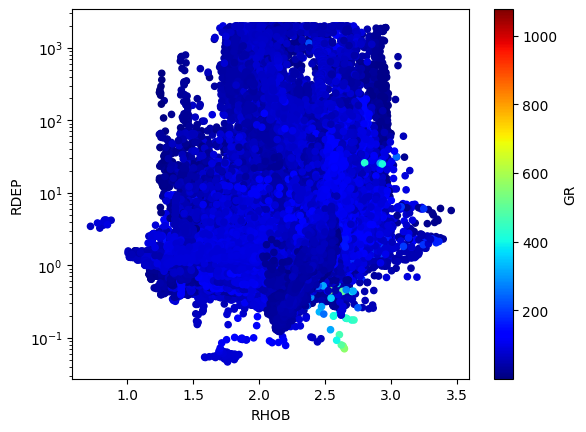

In [7]:
data.plot(kind = 'scatter', x = 'RHOB', y = 'RDEP', c='GR', colormap='jet', logy=True )

<Axes: xlabel='NPHI', ylabel='RHOB'>

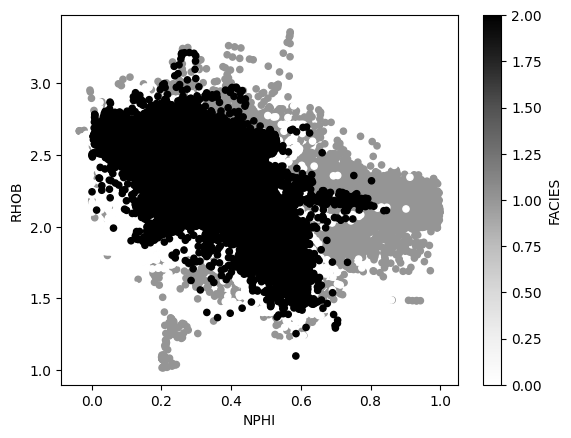

In [33]:

data.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', c='FACIES')



In [ ]:
# fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
# shale_sss=pd.concat([shale, sand, ss])
scatter = ax.scatter(shale_sss["NPHI"], 
                     shale_sss["RHOB"], 
                     c=shale_sss["FORCE_2020_LITHOFACIES_LITHOLOGY"])

# Customize the plot
ax.set(title= 'NPHI' + ' vs ' + 'RHOB' ,
       xlabel="NPHI",
       ylabel="RHOB");
ax.legend(*scatter.legend_elements(), title="Facies");